In [1]:
# Dance to import our logit model
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from k_means import k_means, get_labels
from voronoi_processing import get_polygons, interpolate_centroid_history

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [3]:
def generate_data(
    n_clusters=3, 
    cluster_spread=1.0, 
    cluster_size=15,
    cluster_size_spread=5,
    x_range=[0, 5], 
    y_range=[0, 5]
):
    data = []
    
    axes_ranges = np.array([x_range, y_range])
    ranges = np.abs(np.diff(axes_ranges, axis=1)).reshape(2,)

    cluster_centers = np.random.rand(n_clusters, 2)
    cluster_centers = (cluster_centers * ranges) + axes_ranges[:, 0].reshape(2,)
    
    choice_array =  np.arange(-cluster_size_spread, cluster_size_spread+1, 1)
    cluster_sizes = [
        cluster_size + np.random.choice(choice_array)
        for i in range(n_clusters)
    ]
    
    for i in range(len(cluster_sizes)):
        cluster = np.random.uniform(-cluster_spread, cluster_spread, (cluster_sizes[i], 2))
        
        cluster += cluster_centers[i, :]
        data.append(cluster)
        
    data = np.vstack(data)
    return data

In [4]:
# data = generate_data(4, cluster_spread=0.5, cluster_size=15, x_range=[0.5, 4.5], y_range=[0.5, 4.5])
data = np.load("data/synth_data.npy")

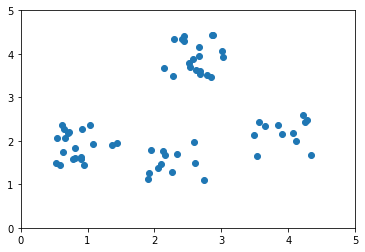

In [5]:
plt.xlim(0, 5)
plt.ylim(0,5)
plt.scatter(data[:, 0], data[:, 1])

In [10]:
centroid_original = k_means(data, 4, verbose=True)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [13]:
centroid_history = interpolate_centroid_history(centroid_original, 150, 2)

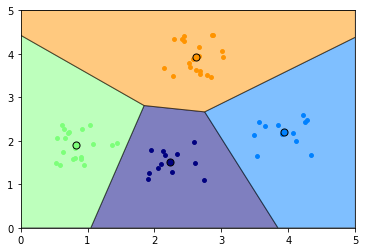

In [14]:
color_palette = plt.get_cmap("jet")

fig = plt.figure()
plt.xlim(0, 5)
plt.ylim(0, 5)
camera = Camera(fig)
for i in range(len(centroid_history)):
# for i in range(1):
    polygons = get_polygons(centroid_history[i], [0, 5], [0, 5])
    labels = get_labels(data, centroid_history[i])
    for j, p in enumerate(polygons):
        
        
        color = color_palette(j/centroid_history[i].shape[0])
        
        plt.scatter(data[labels==j, 0], data[labels==j, 1], color=color, s=15)
        plt.fill(p[:, 0], p[:, 1], c=color, alpha=0.5, edgecolor="black")
        plt.scatter(centroid_history[i][j, 0], centroid_history[i][j, 1], s=50, color=color, edgecolor="black")
        
    camera.snap()

animation = camera.animate()
animation.save("/Users/jacobbumgarner/Desktop/b.mp4", fps=30, dpi=150,
               progress_callback=lambda x, _: print(f"Frame: {x}/{len(centroid_history)}", end="\r"))